# Project description

As a financial institution regulated by the FCA, N26 has the obligation to verify the identity of all
customers who want to open a N26 account. Each prospective customer has to go through a
Know Your Customer (KYC) process by submitting a government-issued photo ID and a facial
picture of themself to our partner, Veritas.

Veritas then would perform 2 checks:

    Document check: To verify that the photo ID is valid and authentic;
    Facial Similarity check: To verify that the face in the picture is the same with that on the submitted ID.

The customer will ‘pass’ the KYC process and get aboard if the results of both Document and
Facial Similarity checks are ‘clear’. If the result of any check is not ‘clear’, the customer has to
submit all the photos again.

The pass rate is defined as the number of customers who pass both the KYC process divided by
the number of customers who attempt the process. Each customer has up to 2 attempts.


Our goal is to find out which of the verification stages most often leads to the 'consider' for the result_doc column

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
from ast import literal_eval

In [52]:
doc = pd.read_csv(r"C:\Users\OMEN\Desktop\Jobs\KYC-Know Your Customer\doc_reports.csv")
doc.head()

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20T23:12:57Z,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20T23:16:04Z,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20T17:59:49Z,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20T17:59:38Z,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20T18:08:09Z,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [53]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          176404 non-null  int64 
 1   user_id                             176404 non-null  object
 2   result                              176404 non-null  object
 3   visual_authenticity_result          150290 non-null  object
 4   image_integrity_result              176403 non-null  object
 5   face_detection_result               150261 non-null  object
 6   image_quality_result                176403 non-null  object
 7   created_at                          176404 non-null  object
 8   supported_document_result           175900 non-null  object
 9   conclusive_document_quality_result  95217 non-null   object
 10  colour_picture_result               95222 non-null   object
 11  data_validation_result              142

creted_at should be converted to datetime data type.

In [54]:
doc['created_at'] = pd.to_datetime(doc['created_at'], format='%Y-%m-%d %H:%M:%S') 
doc['created_at'] = doc['created_at'].astype('datetime64[ns]')
doc.head()

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20 23:12:57,clear,NaN,NaN,clear,clear,NaN,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20 23:16:04,clear,NaN,NaN,clear,NaN,NaN,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20 17:59:49,clear,NaN,NaN,clear,clear,NaN,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20 17:59:38,clear,NaN,NaN,clear,clear,NaN,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20 18:08:09,clear,NaN,NaN,clear,clear,NaN,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear


In [55]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Unnamed: 0                          176404 non-null  int64         
 1   user_id                             176404 non-null  object        
 2   result                              176404 non-null  object        
 3   visual_authenticity_result          150290 non-null  object        
 4   image_integrity_result              176403 non-null  object        
 5   face_detection_result               150261 non-null  object        
 6   image_quality_result                176403 non-null  object        
 7   created_at                          176404 non-null  datetime64[ns]
 8   supported_document_result           175900 non-null  object        
 9   conclusive_document_quality_result  95217 non-null   object        
 10  colour_p

In [56]:
report_doc = doc.isna().sum().to_frame()
report_doc = report_doc.rename(columns={0:"missing_values"})
report_doc["missing_%"] = (report_doc['missing_values']/doc.shape[0]*100).round(1)
report_doc

,missing_values,missing_%
Unnamed: 0,0,0.0
user_id,0,0.0
result,0,0.0
visual_authenticity_result,26114,14.8
image_integrity_result,1,0.0
face_detection_result,26143,14.8
image_quality_result,1,0.0
created_at,0,0.0
supported_document_result,504,0.3
conclusive_document_quality_result,81187,46.0


In [57]:
doc[doc.duplicated()]

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result


In [58]:
doc[doc.user_id =='b20147d91fdf4ac289ddd80c4be9716a']

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
17,17,b20147d91fdf4ac289ddd80c4be9716a,clear,clear,clear,clear,clear,2017-06-20 19:00:27,clear,NaN,NaN,clear,clear,NaN,2db4bd5ed28948af858881e5e261bc2d,clear,NaN,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear
18,18,b20147d91fdf4ac289ddd80c4be9716a,clear,clear,clear,clear,clear,2017-06-20 19:00:27,clear,NaN,NaN,clear,clear,NaN,aa906e5f7be04ebca1d79091f5294f58,clear,NaN,"{'gender': 'Female', 'nationality': 'GBR', 'do...",clear


In [59]:
face = pd.read_csv(r"C:\Users\OMEN\Desktop\Jobs\KYC-Know Your Customer\facial_similarity_reports.csv")
face.head()

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20T23:12:58Z,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20T23:16:04Z,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20T17:59:49Z,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20T17:59:39Z,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20T18:08:09Z,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [60]:
face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Unnamed: 0                     176404 non-null  int64 
 1   user_id                        176404 non-null  object
 2   result                         176403 non-null  object
 3   face_comparison_result         166007 non-null  object
 4   created_at                     176404 non-null  object
 5   facial_image_integrity_result  175941 non-null  object
 6   visual_authenticity_result     150290 non-null  object
 7   properties                     176404 non-null  object
 8   attempt_id                     176404 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.1+ MB


Need to convert created_at to a datetime type.

In [61]:
face.created_at = pd.to_datetime(face.created_at, format='%Y-%m-%d %H:%M:%S')
face.created_at = face.created_at.astype('datetime64[ns]')
face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176404 entries, 0 to 176403
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Unnamed: 0                     176404 non-null  int64         
 1   user_id                        176404 non-null  object        
 2   result                         176403 non-null  object        
 3   face_comparison_result         166007 non-null  object        
 4   created_at                     176404 non-null  datetime64[ns]
 5   facial_image_integrity_result  175941 non-null  object        
 6   visual_authenticity_result     150290 non-null  object        
 7   properties                     176404 non-null  object        
 8   attempt_id                     176404 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 12.1+ MB


In [62]:
face.head()

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,clear,clear,2017-06-20 23:12:58,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,2017-06-20 23:16:04,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,2017-06-20 17:59:49,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,2017-06-20 17:59:39,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,2017-06-20 18:08:09,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [63]:
report_face = face.isna().sum().to_frame()
report_face = report_face.rename(columns={0:'missing_values'})
report_face['missing_%'] = (report_face['missing_values']/face.shape[0]*100).round(1)
report_face

,missing_values,missing_%
Unnamed: 0,0,0.0
user_id,0,0.0
result,1,0.0
face_comparison_result,10397,5.9
created_at,0,0.0
facial_image_integrity_result,463,0.3
visual_authenticity_result,26114,14.8
properties,0,0.0
attempt_id,0,0.0


In [64]:
face[face.duplicated()]

,Unnamed: 0,user_id,result,face_comparison_result,created_at,facial_image_integrity_result,visual_authenticity_result,properties,attempt_id


In [65]:
merged_data = pd.merge(doc, face, on='user_id', how='left', suffixes=('_doc', '_face'))
merged_data.head()

,Unnamed: 0_doc,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,...,properties_doc,sub_result,Unnamed: 0_face,result_face,face_comparison_result,created_at_face,facial_image_integrity_result,visual_authenticity_result_face,properties_face,attempt_id_face
0,0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20 23:12:57,clear,NaN,...,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",caution,0,clear,clear,2017-06-20 23:12:58,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20 23:16:04,clear,NaN,...,"{'gender': 'Female', 'document_type': 'driving...",clear,1,clear,clear,2017-06-20 23:16:04,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20 17:59:49,clear,NaN,...,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,2,clear,clear,2017-06-20 17:59:49,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20 17:59:38,clear,NaN,...,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,3,clear,clear,2017-06-20 17:59:39,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20 18:08:09,clear,NaN,...,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,4,clear,clear,2017-06-20 18:08:09,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [66]:
merged_data = merged_data.drop(['Unnamed: 0_doc','Unnamed: 0_face',\
    'created_at_face', 'sub_result'], axis=1)
merged_data.head()

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,attempt_id_doc,police_record_result,compromised_document_result,properties_doc,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face,properties_face,attempt_id_face
0,ab23fae164e34af0a1ad1423ce9fd9f0,consider,consider,clear,clear,clear,2017-06-20 23:12:57,clear,NaN,NaN,...,050a0596de424fab83c433eaa18b3f8d,clear,NaN,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",clear,clear,clear,consider,{},050a0596de424fab83c433eaa18b3f8d
1,15a84e8951254011b47412fa4e8f65b8,clear,clear,clear,clear,clear,2017-06-20 23:16:04,clear,NaN,NaN,...,f69c1e5f45a64e50a26740b9bfb978b7,clear,NaN,"{'gender': 'Female', 'document_type': 'driving...",clear,clear,clear,clear,{},f69c1e5f45a64e50a26740b9bfb978b7
2,ffb82fda52b041e4b9af9cb4ef298c85,clear,clear,clear,clear,clear,2017-06-20 17:59:49,clear,NaN,NaN,...,f9f84f3055714d8e8f7419dc984d1769,clear,NaN,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",clear,clear,clear,clear,{},f9f84f3055714d8e8f7419dc984d1769
3,bd4a8b3e3601427e88aa1d9eab9f4290,clear,clear,clear,clear,clear,2017-06-20 17:59:38,clear,NaN,NaN,...,10a54a1ecf794404be959e030f11fef6,clear,NaN,"{'gender': 'Male', 'issuing_date': '2007-08', ...",clear,clear,clear,clear,{},10a54a1ecf794404be959e030f11fef6
4,f52ad1c7e69543a9940c3e7f8ed28a39,clear,clear,clear,clear,clear,2017-06-20 18:08:09,clear,NaN,NaN,...,1f320d1d07de493292b7e0d5ebfb1cb9,clear,NaN,"{'gender': 'Male', 'nationality': 'POL', 'docu...",clear,clear,clear,clear,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [67]:
rel_freq = merged_data.result_doc.value_counts(normalize=True).to_frame()

In [68]:
fig=px.bar(data_frame=rel_freq,y='result_doc',labels={"result_doc":"Number of registrations"},\
    title='Relative frequencies of documentation results')
fig.show()


We can see from visualization that clear documentation have around 65% of potential customers.
Around 35% have not clear documentation so we should look into that.

In [69]:
merged_data.columns

Index(['user_id', 'result_doc', 'visual_authenticity_result_doc',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_doc', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id_doc', 'police_record_result',
       'compromised_document_result', 'properties_doc', 'result_face',
       'face_comparison_result', 'facial_image_integrity_result',
       'visual_authenticity_result_face', 'properties_face',
       'attempt_id_face'],
      dtype='object')


We will change all 'consider' value to 1, and 'clear' = 0 for **map_encode_all** list.

In [70]:
map_encode_all = ['result_doc', 
                  "visual_authenticity_result_doc", 
                  "image_integrity_result", 
                  "face_detection_result", 
                  "image_quality_result",
                  "supported_document_result",
                  'conclusive_document_quality_result',
                  'colour_picture_result', 
                  'data_validation_result',
                  'data_consistency_result', 
                  'data_comparison_result',
                  'police_record_result', 
                  'compromised_document_result',
                  'face_comparison_result', 
                  'facial_image_integrity_result',
                  'visual_authenticity_result_face',
                  'result_face']

result_map = {"consider" : 1, "clear": 0, 'unidentified': 1}

def result_encode(features, dataset):
    for feature in features:
        dataset[feature] = dataset[feature].map(result_map)

In [71]:
result_encode(map_encode_all, merged_data)
merged_data.fillna(0, inplace=True)
merged_data.head()

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,attempt_id_doc,police_record_result,compromised_document_result,properties_doc,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face,properties_face,attempt_id_face
0,ab23fae164e34af0a1ad1423ce9fd9f0,1,1.0,0.0,0.0,0.0,2017-06-20 23:12:57,0.0,0.0,0.0,...,050a0596de424fab83c433eaa18b3f8d,0.0,0.0,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",0.0,0.0,0.0,1.0,{},050a0596de424fab83c433eaa18b3f8d
1,15a84e8951254011b47412fa4e8f65b8,0,0.0,0.0,0.0,0.0,2017-06-20 23:16:04,0.0,0.0,0.0,...,f69c1e5f45a64e50a26740b9bfb978b7,0.0,0.0,"{'gender': 'Female', 'document_type': 'driving...",0.0,0.0,0.0,0.0,{},f69c1e5f45a64e50a26740b9bfb978b7
2,ffb82fda52b041e4b9af9cb4ef298c85,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:49,0.0,0.0,0.0,...,f9f84f3055714d8e8f7419dc984d1769,0.0,0.0,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",0.0,0.0,0.0,0.0,{},f9f84f3055714d8e8f7419dc984d1769
3,bd4a8b3e3601427e88aa1d9eab9f4290,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:38,0.0,0.0,0.0,...,10a54a1ecf794404be959e030f11fef6,0.0,0.0,"{'gender': 'Male', 'issuing_date': '2007-08', ...",0.0,0.0,0.0,0.0,{},10a54a1ecf794404be959e030f11fef6
4,f52ad1c7e69543a9940c3e7f8ed28a39,0,0.0,0.0,0.0,0.0,2017-06-20 18:08:09,0.0,0.0,0.0,...,1f320d1d07de493292b7e0d5ebfb1cb9,0.0,0.0,"{'gender': 'Male', 'nationality': 'POL', 'docu...",0.0,0.0,0.0,0.0,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [72]:
merged_data[merged_data.duplicated()]

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,attempt_id_doc,police_record_result,compromised_document_result,properties_doc,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face,properties_face,attempt_id_face


In [73]:
doc[doc.user_id == 'cafb2c8a27b941cbb0d72f5889fc9911']

,Unnamed: 0,user_id,result,visual_authenticity_result,image_integrity_result,face_detection_result,image_quality_result,created_at,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,attempt_id,police_record_result,compromised_document_result,properties,sub_result
175584,181172,cafb2c8a27b941cbb0d72f5889fc9911,clear,clear,clear,clear,clear,2017-06-23 21:37:21,clear,NaN,NaN,NaN,NaN,NaN,cb91fb4af7b147e8af778e291bd922b2,clear,NaN,"{'gender': 'Female', 'document_type': 'nationa...",clear
176397,181985,cafb2c8a27b941cbb0d72f5889fc9911,clear,clear,clear,clear,clear,2017-06-20 22:09:59,clear,NaN,NaN,clear,clear,NaN,08fbfeda3f38452e8ab36536b0a7adea,clear,NaN,"{'gender': 'Female', 'nationality': 'NLD', 'do...",clear


Example of an user that made two attempts to finish process at different date and time.

In [74]:
len(merged_data[merged_data.duplicated()])

0

In [75]:
merged_data[merged_data.user_id=='b20147d91fdf4ac289ddd80c4be9716a']

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,attempt_id_doc,police_record_result,compromised_document_result,properties_doc,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face,properties_face,attempt_id_face
17,b20147d91fdf4ac289ddd80c4be9716a,0,0.0,0.0,0.0,0.0,2017-06-20 19:00:27,0.0,0.0,0.0,...,2db4bd5ed28948af858881e5e261bc2d,0.0,0.0,"{'gender': 'Female', 'nationality': 'GBR', 'do...",0.0,0.0,0.0,0.0,{},2db4bd5ed28948af858881e5e261bc2d
18,b20147d91fdf4ac289ddd80c4be9716a,0,0.0,0.0,0.0,0.0,2017-06-20 19:00:27,0.0,0.0,0.0,...,2db4bd5ed28948af858881e5e261bc2d,0.0,0.0,"{'gender': 'Female', 'nationality': 'GBR', 'do...",0.0,0.0,0.0,0.0,{},aa906e5f7be04ebca1d79091f5294f58
19,b20147d91fdf4ac289ddd80c4be9716a,0,0.0,0.0,0.0,0.0,2017-06-20 19:00:27,0.0,0.0,0.0,...,aa906e5f7be04ebca1d79091f5294f58,0.0,0.0,"{'gender': 'Female', 'nationality': 'GBR', 'do...",0.0,0.0,0.0,0.0,{},2db4bd5ed28948af858881e5e261bc2d
20,b20147d91fdf4ac289ddd80c4be9716a,0,0.0,0.0,0.0,0.0,2017-06-20 19:00:27,0.0,0.0,0.0,...,aa906e5f7be04ebca1d79091f5294f58,0.0,0.0,"{'gender': 'Female', 'nationality': 'GBR', 'do...",0.0,0.0,0.0,0.0,{},aa906e5f7be04ebca1d79091f5294f58


I will ignore duplicates in merged_data.

Data is now ready for further analysis.

In [76]:
daily_registrations = merged_data.groupby(pd.Grouper(key='created_at_doc', freq='D'))['user_id'].count().to_frame()
daily_registrations

,user_id
created_at_doc,
2017-05-23,119
2017-05-24,237
2017-05-25,185
2017-05-26,261
2017-05-27,220
...,...
2017-10-27,3036
2017-10-28,2129
2017-10-29,1914


In [77]:
fig = px.line(daily_registrations,labels={"created_at_doc":"Date","user_id":"Number of registrations"},\
    y ='user_id',title='Number of registrations per day')
fig.show()

We can see that number of registrations has a positive trend. In October we see specialy high number of registrations. These dates are a bit suspicious so we should look more into it. 

In [78]:
data_corr  = merged_data.corr()
data_corr

,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,supported_document_result,conclusive_document_quality_result,colour_picture_result,data_validation_result,data_consistency_result,data_comparison_result,police_record_result,compromised_document_result,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face
result_doc,1.000000,0.213249,0.928699,0.092479,0.678546,0.158450,0.469345,0.037408,0.153223,0.049970,0.045483,0.018699,0.018906,0.077494,-0.019335,0.077216,0.161769
visual_authenticity_result_doc,0.213249,1.000000,-0.070107,0.433667,-0.075518,-0.017635,-0.015202,0.175420,0.085585,0.101304,-0.004241,0.009888,0.003815,0.090797,0.000144,0.079985,0.774055
image_integrity_result,0.928699,-0.070107,1.000000,-0.024797,0.730641,0.170615,0.505379,0.040280,-0.054344,-0.020087,-0.022045,-0.003872,-0.002746,0.055851,-0.020712,0.058491,-0.058402
face_detection_result,0.092479,0.433667,-0.024797,1.000000,-0.032750,-0.007648,0.006613,0.011738,-0.000921,0.029713,-0.002195,-0.000902,-0.000912,0.132204,-0.003010,0.138964,0.294322
image_quality_result,0.678546,-0.075518,0.730641,-0.032750,1.000000,-0.056112,-0.166209,-0.013247,-0.055106,-0.017696,-0.016107,-0.006622,-0.006695,0.098218,-0.012785,0.101407,-0.061748
supported_document_result,0.158450,-0.017635,0.170615,-0.007648,-0.056112,1.000000,-0.038812,-0.003093,-0.012221,-0.004132,-0.003761,-0.001546,-0.001563,0.033997,0.001472,0.034796,-0.010958
conclusive_document_quality_result,0.469345,-0.015202,0.505379,0.006613,-0.166209,-0.038812,1.000000,0.004167,-0.006771,-0.007433,-0.011141,0.003317,0.005133,-0.056089,-0.015319,-0.056501,-0.015645
colour_picture_result,0.037408,0.175420,0.040280,0.011738,-0.013247,-0.003093,0.004167,1.000000,0.002372,0.015682,-0.000888,-0.000365,-0.000369,0.010820,-0.001628,0.010854,0.144492
data_validation_result,0.153223,0.085585,-0.054344,-0.000921,-0.055106,-0.012221,-0.006771,0.002372,1.000000,0.109401,-0.002581,0.009298,0.001139,-0.001897,0.006612,-0.002969,0.076363
data_consistency_result,0.049970,0.101304,-0.020087,0.029713,-0.017696,-0.004132,-0.007433,0.015682,0.109401,1.000000,-0.001186,0.024492,-0.000493,0.004533,0.003445,0.004411,0.085611


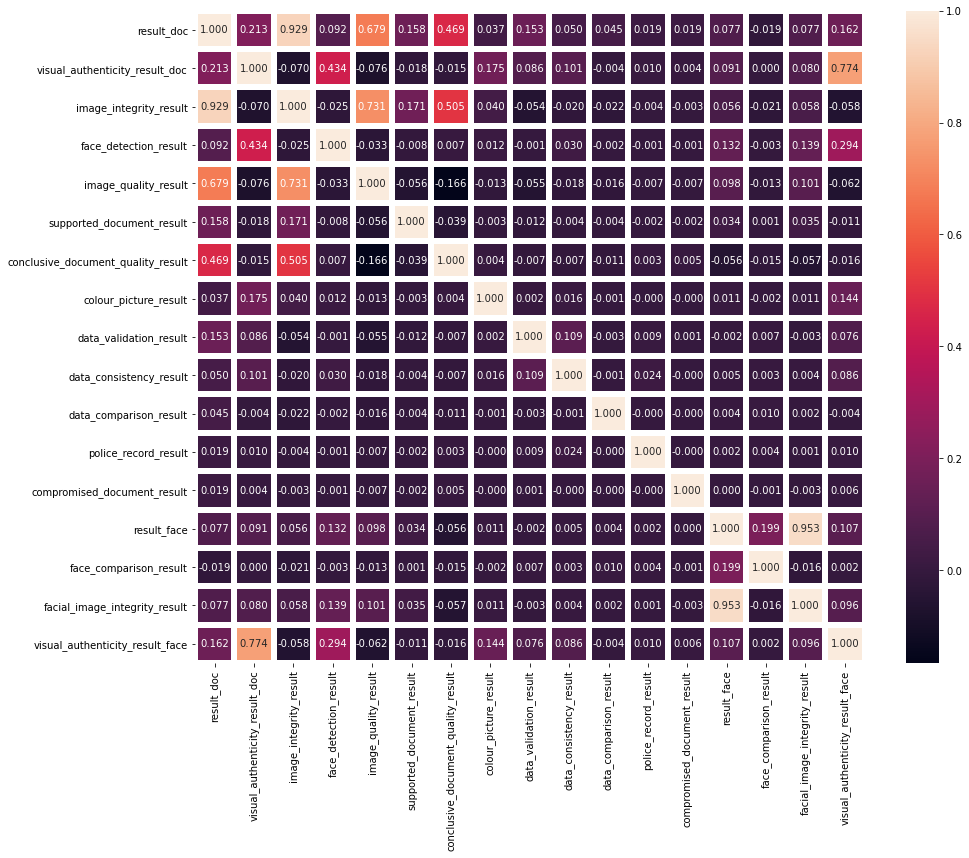

In [79]:
f,ax = plt.subplots(figsize =(15,12))
sn.heatmap(data_corr, annot = True, linewidths = 5, fmt = '.3f', ax = ax)
plt.show()

For **'result_doc'** column very high correlation coefficient **(0,935)** has next stage of KYC:

**image_integrity_result** - Asserts whether the document was of sufficient quality to verify.

For **'result_face'** column very high correlation coefficient **(0,951)** has next stage of KYC:

**facial_image_integrity_result** - Asserts whether the quality of the uploaded files and the content contained within them were sufficient to perform a face comparison

**These parameters have a great influence on the final KYC result.**

In [80]:
merged_data.head()

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,attempt_id_doc,police_record_result,compromised_document_result,properties_doc,result_face,face_comparison_result,facial_image_integrity_result,visual_authenticity_result_face,properties_face,attempt_id_face
0,ab23fae164e34af0a1ad1423ce9fd9f0,1,1.0,0.0,0.0,0.0,2017-06-20 23:12:57,0.0,0.0,0.0,...,050a0596de424fab83c433eaa18b3f8d,0.0,0.0,"{'gender': 'Male', 'nationality': 'IRL', 'docu...",0.0,0.0,0.0,1.0,{},050a0596de424fab83c433eaa18b3f8d
1,15a84e8951254011b47412fa4e8f65b8,0,0.0,0.0,0.0,0.0,2017-06-20 23:16:04,0.0,0.0,0.0,...,f69c1e5f45a64e50a26740b9bfb978b7,0.0,0.0,"{'gender': 'Female', 'document_type': 'driving...",0.0,0.0,0.0,0.0,{},f69c1e5f45a64e50a26740b9bfb978b7
2,ffb82fda52b041e4b9af9cb4ef298c85,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:49,0.0,0.0,0.0,...,f9f84f3055714d8e8f7419dc984d1769,0.0,0.0,"{'gender': 'Male', 'nationality': 'ITA', 'docu...",0.0,0.0,0.0,0.0,{},f9f84f3055714d8e8f7419dc984d1769
3,bd4a8b3e3601427e88aa1d9eab9f4290,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:38,0.0,0.0,0.0,...,10a54a1ecf794404be959e030f11fef6,0.0,0.0,"{'gender': 'Male', 'issuing_date': '2007-08', ...",0.0,0.0,0.0,0.0,{},10a54a1ecf794404be959e030f11fef6
4,f52ad1c7e69543a9940c3e7f8ed28a39,0,0.0,0.0,0.0,0.0,2017-06-20 18:08:09,0.0,0.0,0.0,...,1f320d1d07de493292b7e0d5ebfb1cb9,0.0,0.0,"{'gender': 'Male', 'nationality': 'POL', 'docu...",0.0,0.0,0.0,0.0,{},1f320d1d07de493292b7e0d5ebfb1cb9


In [82]:
merged_data.created_at_doc.describe(datetime_is_numeric=True)


count                           246646
mean     2017-09-04 14:33:58.334184704
min                2017-05-23 15:13:02
25%         2017-08-02 18:38:42.500000
50%         2017-09-12 07:26:39.500000
75%                2017-10-08 18:47:42
max                2017-10-31 23:54:24
Name: created_at_doc, dtype: object

In [83]:
merged_data.properties_doc = merged_data.properties_doc.fillna('{}')
merged_data.properties_doc = merged_data.properties_doc.apply(literal_eval)
merged_data = merged_data.join(pd.json_normalize(merged_data.properties_doc))
merged_data.drop(columns=['properties_doc'],inplace=True)

Replace NaN with '{}' if the column is strings, otherwise replace with {}.

Normalize the column of dictionaries and join it to df.

drop properties_doc.

In [84]:
merged_data.head()

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,properties_face,attempt_id_face,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
0,ab23fae164e34af0a1ad1423ce9fd9f0,1,1.0,0.0,0.0,0.0,2017-06-20 23:12:57,0.0,0.0,0.0,...,{},050a0596de424fab83c433eaa18b3f8d,Male,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN
1,15a84e8951254011b47412fa4e8f65b8,0,0.0,0.0,0.0,0.0,2017-06-20 23:16:04,0.0,0.0,0.0,...,{},f69c1e5f45a64e50a26740b9bfb978b7,Female,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:49,0.0,0.0,0.0,...,{},f9f84f3055714d8e8f7419dc984d1769,Male,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:38,0.0,0.0,0.0,...,{},10a54a1ecf794404be959e030f11fef6,Male,NaN,national_identity_card,NaN,FRA,2007-08,NaN,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,0,0.0,0.0,0.0,0.0,2017-06-20 18:08:09,0.0,0.0,0.0,...,{},1f320d1d07de493292b7e0d5ebfb1cb9,Male,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN


In [195]:
#pd.set_option('display.max_columns', None)

In [85]:
merged_data.head()

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,properties_face,attempt_id_face,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
0,ab23fae164e34af0a1ad1423ce9fd9f0,1,1.0,0.0,0.0,0.0,2017-06-20 23:12:57,0.0,0.0,0.0,...,{},050a0596de424fab83c433eaa18b3f8d,Male,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN
1,15a84e8951254011b47412fa4e8f65b8,0,0.0,0.0,0.0,0.0,2017-06-20 23:16:04,0.0,0.0,0.0,...,{},f69c1e5f45a64e50a26740b9bfb978b7,Female,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:49,0.0,0.0,0.0,...,{},f9f84f3055714d8e8f7419dc984d1769,Male,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:38,0.0,0.0,0.0,...,{},10a54a1ecf794404be959e030f11fef6,Male,NaN,national_identity_card,NaN,FRA,2007-08,NaN,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,0,0.0,0.0,0.0,0.0,2017-06-20 18:08:09,0.0,0.0,0.0,...,{},1f320d1d07de493292b7e0d5ebfb1cb9,Male,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN


In [86]:
filt = (merged_data['created_at_doc']>= '2017-10-01')
suspicious_data = merged_data.loc[filt]
suspicious_data.head()

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,properties_face,attempt_id_face,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
899,c370954b7cb74f2093afc75ad1ede011,1,0.0,1.0,0.0,0.0,2017-10-18 20:33:30,0.0,1.0,0.0,...,{},1e2dea0b98de475285fd1135af53f5cf,Male,GBR,passport,2017-06-05,GBR,NaN,NaN,NaN
900,c370954b7cb74f2093afc75ad1ede011,1,0.0,1.0,0.0,0.0,2017-10-18 20:33:30,0.0,1.0,0.0,...,{},5d7515c875934193b46dcbb4e7616bc1,Male,GBR,passport,2017-06-05,GBR,NaN,NaN,NaN
901,68c5df68b9f841f297274b219ba14b59,1,0.0,1.0,0.0,0.0,2017-10-16 17:51:58,0.0,1.0,0.0,...,{},1efb7dd42f304a2aaeba7dfc53591cea,Female,NaN,driving_licence,2025-02-10,GBR,2016-11-15,NaN,NaN
902,68c5df68b9f841f297274b219ba14b59,1,0.0,1.0,0.0,0.0,2017-10-16 17:51:58,0.0,1.0,0.0,...,{},c4ebea0748ee4ac193f40f84f89df2cd,Female,NaN,driving_licence,2025-02-10,GBR,2016-11-15,NaN,NaN
903,1061b17d6fb84619ab72444fd7722698,0,0.0,0.0,0.0,0.0,2017-10-16 17:51:48,0.0,0.0,0.0,...,{},e84ee1bd89e94790ab71ac2e82f6c9ba,NaN,NaN,driving_licence,2022-08-24,FRA,2017-08-24,NaN,NaN


We saw from correlation heat map that result_doc higly correlates with image_integrity_result. So let's look into that.

## image_integrity_result parameter

**image_integrity_result** - Asserts whether the document was of sufficient quality to verify.

In [87]:
suspicious_data.image_integrity_result.value_counts(normalize=True)

0.0    0.50022
1.0    0.49978
Name: image_integrity_result, dtype: float64

We have defined 'consider'=1 so 1 means that the account did not pass the autorisation.

49.9% of documents was not of sufficient quality to verify.

In [88]:
suspicious_data[suspicious_data['image_integrity_result'] == 1]['issuing_country'].value_counts()

GBR    7509
FRA    2630
LTU    1672
IRL    1605
POL     866
       ... 
PAK       1
NPL       1
TGO       1
SAU       1
RKS       1
Name: issuing_country, Length: 91, dtype: int64

In [89]:
suspicious_data[suspicious_data['image_integrity_result'] == 1]['issuing_country'].value_counts()[:10]

GBR    7509
FRA    2630
LTU    1672
IRL    1605
POL     866
ESP     828
PRT     659
ITA     572
DEU     569
NLD     311
Name: issuing_country, dtype: int64

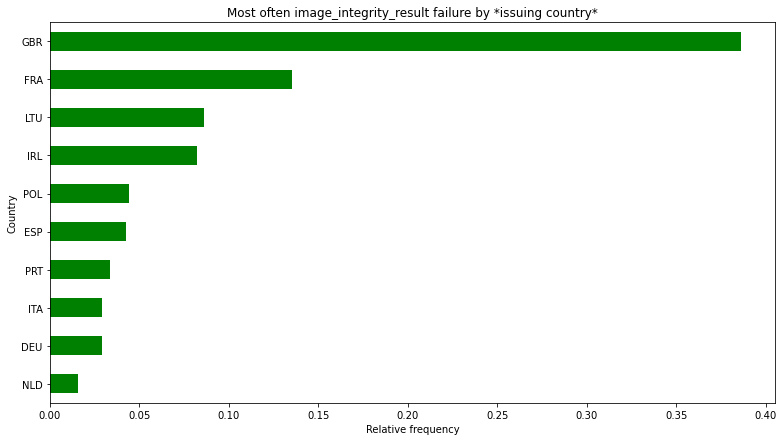

In [201]:
suspicious_data[suspicious_data['image_integrity_result'] == 1]['issuing_country'].value_counts(normalize=True)[:10].sort_values(ascending=True)\
    .plot(kind='barh',figsize=(13,7),color='green')
plt.title('Most often image_integrity_result failure by *issuing country*')
plt.xlabel('Relative frequency')
plt.ylabel('Country')
plt.show()

We can see that almost 40% of image_integrity_result failure happen in Great Britain, in France around 15% and Lithuania and Ireland around 10%.

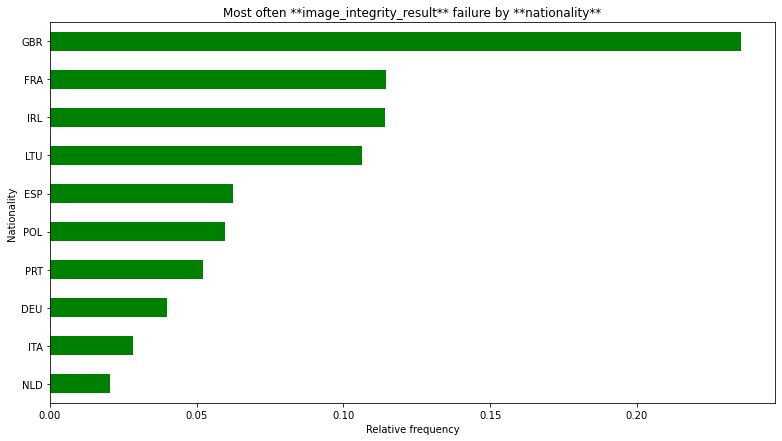

In [90]:
suspicious_data[suspicious_data['image_integrity_result'] == 1]['nationality'].value_counts(normalize=True)[:10].sort_values(ascending=True)\
    .plot(kind='barh',figsize=(13,7),color='green')
plt.title('Most often **image_integrity_result** failure by **nationality**')
plt.xlabel('Relative frequency')
plt.ylabel('Nationality')
plt.show()

*image_integrity_result* failure by *nationality* corresponds to the *image_integrity_result* failure by *country*

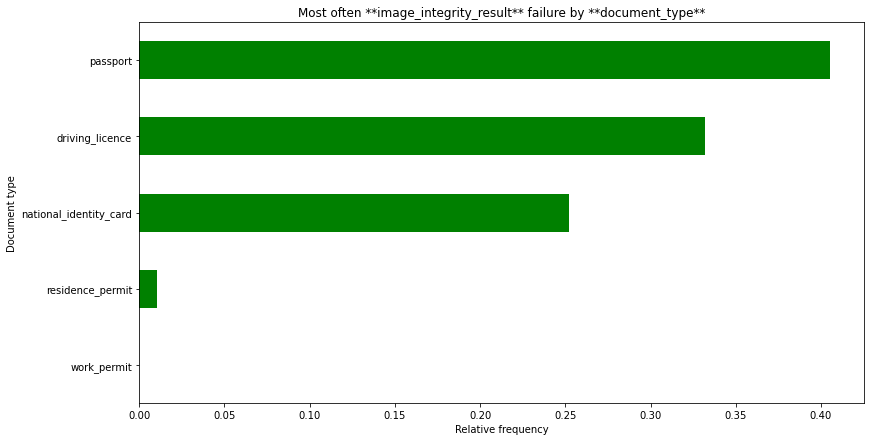

In [91]:
suspicious_data[suspicious_data['image_integrity_result'] == 1]['document_type'].value_counts(normalize=True)[:10].sort_values(ascending=True)\
    .plot(kind='barh',figsize=(13,7),color='green')
plt.title('Most often **image_integrity_result** failure by **document_type**')
plt.xlabel('Relative frequency')
plt.ylabel('Document type')
plt.show()

More then 40% **image_integrity_result** failure happen by **passport** issuing.

## facial_image_integrity_result paremeter

**facial_image_integrity_result** - Asserts whether the quality of the uploaded files and the content contained within them were sufficient to perform a face comparison

In [92]:
suspicious_data.facial_image_integrity_result.value_counts(normalize=True)

0.0    0.959674
1.0    0.040326
Name: facial_image_integrity_result, dtype: float64

Only 4% of the uploaded files and the content contained within them were not sufficient to perform a face comparison.

In [93]:
suspicious_data[suspicious_data['facial_image_integrity_result'] == 1]

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,properties_face,attempt_id_face,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
900,c370954b7cb74f2093afc75ad1ede011,1,0.0,1.0,0.0,0.0,2017-10-18 20:33:30,0.0,1.0,0.0,...,{},5d7515c875934193b46dcbb4e7616bc1,Male,GBR,passport,2017-06-05,GBR,NaN,NaN,NaN
913,d574be9daf4646ee9738ff52f12990dd,0,0.0,0.0,0.0,0.0,2017-10-17 20:59:57,0.0,0.0,0.0,...,{},11e65eb6cebc405789d875425fcb9d51,Male,GBR,national_identity_card,2019-12-07,ARE,NaN,NaN,NaN
1007,976f5d8e8cb04a3aa40025c2c5c237db,0,0.0,0.0,0.0,0.0,2017-10-14 10:25:20,0.0,0.0,0.0,...,{},fc69454584424dcdb0b86b1ff8ca5168,Female,COL,passport,2021-01-25,COL,NaN,NaN,NaN
1084,3005b188b7374d53bd06082b19dde5c1,1,0.0,1.0,0.0,0.0,2017-10-15 07:19:11,0.0,1.0,0.0,...,{},916c16a866684f5589c5e5582f009fa6,Male,NaN,driving_licence,2027-06-14,GBR,2017-07-08,NaN,NaN
1132,6e85fcd509534e4da0d3d8e9a20bbadc,1,1.0,0.0,0.0,0.0,2017-10-06 19:03:25,0.0,0.0,0.0,...,{},34ccfeec85fc42bd9895d824c50d429d,Male,TWN,passport,2019-04-17,TWN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196529,e9f46cb37e4b4dbe962c0fa9f1ba99f8,1,0.0,1.0,0.0,0.0,2017-10-18 11:21:38,1.0,0.0,0.0,...,{},d4c8006a171849e59b177a7ff4276481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198175,4115d88defeb408fba256d39b85cd8a1,1,0.0,1.0,0.0,1.0,2017-10-17 00:17:14,0.0,0.0,0.0,...,{},d3b9e44b762242c48d982a0fc4a9f577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198176,4115d88defeb408fba256d39b85cd8a1,1,0.0,1.0,0.0,1.0,2017-10-17 00:17:14,0.0,0.0,0.0,...,{},8d210ad7e39e44af8414a8d78ec1ad5b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211330,657cb1a316cf4f42aca061d4e8d62aca,0,0.0,0.0,0.0,0.0,2017-10-16 19:31:54,0.0,0.0,0.0,...,{},693049f037594fa48b0db89950910c0b,Female,ESP,national_identity_card,2022-08-28,ESP,NaN,NaN,NaN


The customer will ‘pass’ the KYC process and get aboard if the results of both Document and
Facial Similarity checks are ‘clear’. If the result of any check is not ‘clear’, the customer has to
submit all the photos again.

The pass rate is defined as the number of customers who pass both the KYC process divided by
the number of customers who attempt the process. Each customer has up to 2 attempts.

In [94]:
merged_data.head()

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,properties_face,attempt_id_face,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
0,ab23fae164e34af0a1ad1423ce9fd9f0,1,1.0,0.0,0.0,0.0,2017-06-20 23:12:57,0.0,0.0,0.0,...,{},050a0596de424fab83c433eaa18b3f8d,Male,IRL,passport,2019-08-12,IRL,NaN,NaN,NaN
1,15a84e8951254011b47412fa4e8f65b8,0,0.0,0.0,0.0,0.0,2017-06-20 23:16:04,0.0,0.0,0.0,...,{},f69c1e5f45a64e50a26740b9bfb978b7,Female,NaN,driving_licence,2023-02-28,GBR,NaN,NaN,NaN
2,ffb82fda52b041e4b9af9cb4ef298c85,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:49,0.0,0.0,0.0,...,{},f9f84f3055714d8e8f7419dc984d1769,Male,ITA,passport,2018-06-09,ITA,NaN,NaN,NaN
3,bd4a8b3e3601427e88aa1d9eab9f4290,0,0.0,0.0,0.0,0.0,2017-06-20 17:59:38,0.0,0.0,0.0,...,{},10a54a1ecf794404be959e030f11fef6,Male,NaN,national_identity_card,NaN,FRA,2007-08,NaN,NaN
4,f52ad1c7e69543a9940c3e7f8ed28a39,0,0.0,0.0,0.0,0.0,2017-06-20 18:08:09,0.0,0.0,0.0,...,{},1f320d1d07de493292b7e0d5ebfb1cb9,Male,POL,national_identity_card,2019-05-29,POL,NaN,NaN,NaN


In [95]:
pass_rate = len(merged_data[(merged_data['result_doc']==0) & (merged_data['result_face']==0)])/len(merged_data)
pass_rate

0.6123148155656285

Pass rate is 0.61 but we still need to cheek were there maximum 2 attempts.

In [96]:
merged_data.columns

Index(['user_id', 'result_doc', 'visual_authenticity_result_doc',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_doc', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id_doc', 'police_record_result',
       'compromised_document_result', 'result_face', 'face_comparison_result',
       'facial_image_integrity_result', 'visual_authenticity_result_face',
       'properties_face', 'attempt_id_face', 'gender', 'nationality',
       'document_type', 'date_of_expiry', 'issuing_country', 'issuing_date',
       'issuing_state', 'document_version'],
      dtype='object')

In [97]:
attempt_counts = merged_data.groupby(['user_id'])[['attempt_id_doc','attempt_id_face']].count().reset_index()
attempt_counts

,user_id,attempt_id_doc,attempt_id_face
0,000017082a4548d4aa480781069cf24c,4,4
1,000052fe85524411a593a999c2a24462,1,1
2,0000ae3e6cad4aa6b22a70c141cfebea,4,4
3,0001c1eacfdd4f1580b024de206c61e6,1,1
4,000215b70cd5498fa7384d7ccdc166c8,1,1
...,...,...,...
142719,fffdf0314d2a42c8922e5b459804857b,1,1
142720,fffe24c9067c41c5b217e25f457f4c45,1,1
142721,fffe793811f24cdab0d6dca6c615d89c,4,4
142722,ffff69137fd8419a8b2f521368cccce6,1,1


It is obvious thate there have been users with more than 2 attempts. We could flag this as suspicious.

In [98]:
attempt_counts[attempt_counts['attempt_id_doc']!= attempt_counts['attempt_id_face']]

,user_id,attempt_id_doc,attempt_id_face


Number of documents checks and number of facial similarity checks are the same for every potential client.

    Document check: To verify that the photo ID is valid and authentic
    Facial Similarity check: To verify that the face in the picture is the same with that on the submitted ID.

When Facial Similarity check fails then the Document check also fails.

In [99]:
too_much_attempts = attempt_counts[attempt_counts['attempt_id_doc'] > 2]
too_much_attempts

,user_id,attempt_id_doc,attempt_id_face
0,000017082a4548d4aa480781069cf24c,4,4
2,0000ae3e6cad4aa6b22a70c141cfebea,4,4
5,000248ce7e624a4ab6ab79f3aa2d9313,4,4
6,0003a96d3ab842d0b2b672717b2a280c,4,4
18,000930fd473d4c6fbee9d9328f97cd07,4,4
...,...,...,...
142687,fff0d479319c4904b913efbe425f3cb3,4,4
142696,fff54f42d9b14bc1a081d6ecd32733e7,9,9
142702,fff89bbd1d624fb691cb73da2c6b9005,4,4
142714,fffc8c44b8c047bca897e6be66cbdbca,9,9


In [100]:
len(attempt_counts[attempt_counts['attempt_id_doc'] > 2])/len(attempt_counts)

0.22666124828340012

More than 22% of all customer checks have made more than 2 attempts which is not allowed.

In [213]:
suspicious_2 = merged_data[merged_data.user_id.isin(too_much_attempts.user_id)]
suspicious_2

,user_id,result_doc,visual_authenticity_result_doc,image_integrity_result,face_detection_result,image_quality_result,created_at_doc,supported_document_result,conclusive_document_quality_result,colour_picture_result,...,properties_face,attempt_id_face,gender,nationality,document_type,date_of_expiry,issuing_country,issuing_date,issuing_state,document_version
17,b20147d91fdf4ac289ddd80c4be9716a,0,0.0,0.0,0.0,0.0,2017-06-20 19:00:27,0.0,0.0,0.0,...,{},2db4bd5ed28948af858881e5e261bc2d,Female,GBR,passport,2018-01-21,GBR,NaN,NaN,NaN
18,b20147d91fdf4ac289ddd80c4be9716a,0,0.0,0.0,0.0,0.0,2017-06-20 19:00:27,0.0,0.0,0.0,...,{},aa906e5f7be04ebca1d79091f5294f58,Female,GBR,passport,2018-01-21,GBR,NaN,NaN,NaN
19,b20147d91fdf4ac289ddd80c4be9716a,0,0.0,0.0,0.0,0.0,2017-06-20 19:00:27,0.0,0.0,0.0,...,{},2db4bd5ed28948af858881e5e261bc2d,Female,GBR,passport,2018-01-21,GBR,NaN,NaN,NaN
20,b20147d91fdf4ac289ddd80c4be9716a,0,0.0,0.0,0.0,0.0,2017-06-20 19:00:27,0.0,0.0,0.0,...,{},aa906e5f7be04ebca1d79091f5294f58,Female,GBR,passport,2018-01-21,GBR,NaN,NaN,NaN
26,7e66b2c14ea74d28af5547be220455dd,0,0.0,0.0,0.0,0.0,2017-06-20 19:39:10,0.0,0.0,0.0,...,{},e3549a16f4054976a7a994f1b268d195,NaN,NaN,driving_licence,2022-11-06,RUS,NaN,FL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246637,cafb2c8a27b941cbb0d72f5889fc9911,0,0.0,0.0,0.0,0.0,2017-06-20 22:09:59,0.0,0.0,0.0,...,{},08fbfeda3f38452e8ab36536b0a7adea,Female,NLD,passport,2027-01-11,NLD,NaN,NaN,NaN
246638,3d16e02c245a4f1a8a76662ad933d5c4,0,0.0,0.0,0.0,0.0,2017-06-20 22:25:59,0.0,0.0,0.0,...,{},5adad81d87ed46d3b0c3b9214af9d80d,Female,GBR,passport,2023-07-11,GBR,NaN,NaN,NaN
246639,3d16e02c245a4f1a8a76662ad933d5c4,0,0.0,0.0,0.0,0.0,2017-06-20 22:25:59,0.0,0.0,0.0,...,{},bfea35bcb6a940118ca5816cd8ffcae7,Female,GBR,passport,2023-07-11,GBR,NaN,NaN,NaN
246642,3d16e02c245a4f1a8a76662ad933d5c4,0,0.0,0.0,0.0,0.0,2017-06-20 22:25:59,0.0,0.0,0.0,...,{},5adad81d87ed46d3b0c3b9214af9d80d,Female,GBR,passport,2023-07-11,GBR,NaN,NaN,NaN


This is the dataset on all potential customers with more than 2 attempts.

In [214]:
suspicious_2.columns

Index(['user_id', 'result_doc', 'visual_authenticity_result_doc',
       'image_integrity_result', 'face_detection_result',
       'image_quality_result', 'created_at_doc', 'supported_document_result',
       'conclusive_document_quality_result', 'colour_picture_result',
       'data_validation_result', 'data_consistency_result',
       'data_comparison_result', 'attempt_id_doc', 'police_record_result',
       'compromised_document_result', 'result_face', 'face_comparison_result',
       'facial_image_integrity_result', 'visual_authenticity_result_face',
       'properties_face', 'attempt_id_face', 'gender', 'nationality',
       'document_type', 'date_of_expiry', 'issuing_country', 'issuing_date',
       'issuing_state', 'document_version'],
      dtype='object')

In [215]:
suspicious_2[['user_id','result_doc','attempt_id_doc','gender','nationality','document_type','issuing_country']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136272 entries, 17 to 246643
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   user_id          136272 non-null  object
 1   result_doc       136272 non-null  int64 
 2   attempt_id_doc   136272 non-null  object
 3   gender           71026 non-null   object
 4   nationality      47482 non-null   object
 5   document_type    87434 non-null   object
 6   issuing_country  87431 non-null   object
dtypes: int64(1), object(6)
memory usage: 8.3+ MB


In [216]:
suspicious_2.shape[0]

136272

In [217]:
suspicious_2_report = suspicious_2[['user_id','result_doc','attempt_id_doc','gender','nationality','document_type','issuing_country']].isna().sum().to_frame()
suspicious_2_report.rename(columns={0:'missing_values'},inplace=True)
suspicious_2_report['%_missing'] = (suspicious_2_report['missing_values']/suspicious_2.shape[0]*100).round(2)
suspicious_2_report

,missing_values,%_missing
user_id,0,0.00
result_doc,0,0.00
attempt_id_doc,0,0.00
gender,65246,47.88
nationality,88790,65.16
document_type,48838,35.84
issuing_country,48841,35.84


There are 35% of missing data on 'document_type' and 'issuing_country'.

In [218]:
X = suspicious_2[['user_id','result_doc','attempt_id_doc','gender','nationality','document_type','issuing_country']].reset_index(drop=True)
X

,user_id,result_doc,attempt_id_doc,gender,nationality,document_type,issuing_country
0,b20147d91fdf4ac289ddd80c4be9716a,0,2db4bd5ed28948af858881e5e261bc2d,Female,GBR,passport,GBR
1,b20147d91fdf4ac289ddd80c4be9716a,0,2db4bd5ed28948af858881e5e261bc2d,Female,GBR,passport,GBR
2,b20147d91fdf4ac289ddd80c4be9716a,0,aa906e5f7be04ebca1d79091f5294f58,Female,GBR,passport,GBR
3,b20147d91fdf4ac289ddd80c4be9716a,0,aa906e5f7be04ebca1d79091f5294f58,Female,GBR,passport,GBR
4,7e66b2c14ea74d28af5547be220455dd,0,e3549a16f4054976a7a994f1b268d195,NaN,NaN,driving_licence,RUS
...,...,...,...,...,...,...,...
136267,cafb2c8a27b941cbb0d72f5889fc9911,0,08fbfeda3f38452e8ab36536b0a7adea,Female,NLD,passport,NLD
136268,3d16e02c245a4f1a8a76662ad933d5c4,0,5adad81d87ed46d3b0c3b9214af9d80d,Female,GBR,passport,GBR
136269,3d16e02c245a4f1a8a76662ad933d5c4,0,5adad81d87ed46d3b0c3b9214af9d80d,Female,GBR,passport,GBR
136270,3d16e02c245a4f1a8a76662ad933d5c4,0,bfea35bcb6a940118ca5816cd8ffcae7,Female,GBR,passport,GBR


In [220]:
X.dropna(subset=['issuing_country'],inplace=True)

In [222]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87431 entries, 0 to 136271
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          87431 non-null  object
 1   result_doc       87431 non-null  int64 
 2   attempt_id_doc   87431 non-null  object
 3   gender           71026 non-null  object
 4   nationality      47482 non-null  object
 5   document_type    87425 non-null  object
 6   issuing_country  87431 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [224]:
#X[['user_id','result_doc','attempt_id_doc','issuing_country']].to_excel('tableau_exercise.xlsx',index=False)

In [227]:
X.head()

,user_id,result_doc,attempt_id_doc,gender,nationality,document_type,issuing_country
0,b20147d91fdf4ac289ddd80c4be9716a,0,2db4bd5ed28948af858881e5e261bc2d,Female,GBR,passport,GBR
1,b20147d91fdf4ac289ddd80c4be9716a,0,2db4bd5ed28948af858881e5e261bc2d,Female,GBR,passport,GBR
2,b20147d91fdf4ac289ddd80c4be9716a,0,aa906e5f7be04ebca1d79091f5294f58,Female,GBR,passport,GBR
3,b20147d91fdf4ac289ddd80c4be9716a,0,aa906e5f7be04ebca1d79091f5294f58,Female,GBR,passport,GBR
4,7e66b2c14ea74d28af5547be220455dd,0,e3549a16f4054976a7a994f1b268d195,NaN,NaN,driving_licence,RUS


In [242]:
X.groupby('attempt_id_doc')['user_id'].nunique().sort_values(ascending=False)[:10]

attempt_id_doc
fffc96a099114cefb8d06fb7f6d7ad47    1
54beb8f6b70c4f8abdc1ed664a266dcd    1
54b9366ae5ea4fe4b99e487595fcdf11    1
54b82139b8bb453abc5bd3610719f420    1
54b7a64024074384995b874281632f9c    1
54b69de6676847fabf7eb1cf8a933365    1
54b5ebbdea774d9a9482c84c5a0c8684    1
54b2fd3995504e2290651191d6e1b273    1
54b2f2bd8e5c4b39a24b163336f04b81    1
54b2589f8cb74bb097ffda0359cc7cb0    1
Name: user_id, dtype: int64

In [74]:
suspicious_22 = suspicious_2.groupby('user_id')['issuing_country'].nunique().reset_index().sort_values(by='issuing_country',ascending=False)
suspicious_22

,user_id,issuing_country
1060,08bee7402bff4bb19dcdd167cc700f61,3
24075,be8f9f7322dc430dae08d3dabffca2f0,3
18648,93fb5f70f1df47c9b77a5ef15f0713f3,2
20300,a0f91fb7018c4781b77efd0a3c6424fa,2
23865,bd0eca816ce446638685621be9f1398a,2
...,...,...
11717,5d208c82f5a44f908529d8cd27696c97,0
17482,89ef6a4f1e0e49beb56b3581c67a16a2,0
26898,d4cbb4d84ee6414bb0b15d368725377e,0
17483,89f1b546012d4a2a943e2541e9886e22,0


In [76]:
suspicious_22[suspicious_22['issuing_country'] >1]

,user_id,issuing_country
1060,08bee7402bff4bb19dcdd167cc700f61,3
24075,be8f9f7322dc430dae08d3dabffca2f0,3
18648,93fb5f70f1df47c9b77a5ef15f0713f3,2
20300,a0f91fb7018c4781b77efd0a3c6424fa,2
23865,bd0eca816ce446638685621be9f1398a,2
...,...,...
27981,dd7f24391fb5460fa89ab13abb5f5878,2
9181,48acdb700e964b079c40a42d54e9ef81,2
16488,8265c7f4d428420cba9886299444bee7,2
4147,21217dba769245568303566b4e3b19c0,2


In [66]:
suspicious_2.result_doc.value_counts(normalize=True)

1    0.582467
0    0.417533
Name: result_doc, dtype: float64

41% of clients that have made more then 2 attempts in validation of documentation 

In [64]:
fig=px.histogram(suspicious_2, x=suspicious_2.issuing_country)
fig.show()